# Task 11: SVM – Breast Cancer Classification

# 1️⃣ Import Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# 2️⃣ Load Dataset & Inspect

In [7]:
data = load_breast_cancer()

X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Labels distribution:", np.bincount(y))

Feature shape: (569, 30)
Labels distribution: [212 357]


# 3️⃣ Train–Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ Baseline SVM (Linear Kernel)

In [29]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True))
])

linear_pipeline.fit(X_train, y_train)

y_pred_linear = linear_pipeline.predict(X_test)

print("Linear SVM Accuracy:",
      accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.9736842105263158


# 5️⃣ SVM with RBF Kernel

In [36]:
rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))

])

rbf_pipeline.fit(X_train, y_train)

y_pred_rbf = rbf_pipeline.predict(X_test)

print("RBF SVM Accuracy:",
      accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9824561403508771


# 6️⃣ Hyperparameter Tuning using GridSearchCV

In [41]:
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(
    rbf_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best CV Accuracy: 0.9802197802197803


# 7️⃣ Evaluation: Confusion Matrix & Report

In [46]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred))

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# 8️⃣ ROC Curve & AUC Score

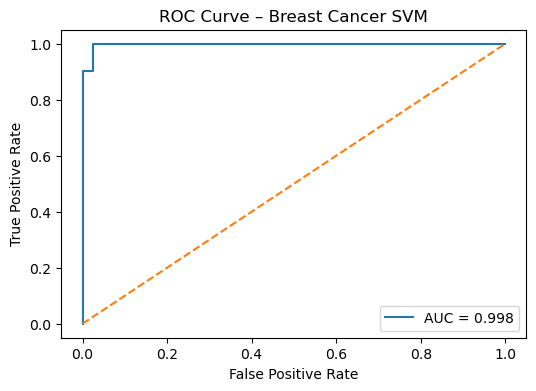

AUC Score: 0.9976851851851851


In [51]:
y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Breast Cancer SVM")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)

# 9️⃣ Save Trained Model (Scaler + SVM)

In [54]:
joblib.dump(best_model, "svm_breast_cancer_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# loaded_model = joblib.load("svm_breast_cancer_model.pkl")